In [1]:
#Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

### 1. Data preprocessing and feature engineering

We need to merge the data from separate files for red and white wines. In order to identify the type of wine after merging the datasets, we would introduce a new feature *"wine_type"*.    

In [22]:
dfWhiteWine = pd.read_csv("winequality-white.csv", sep=";")
dfWhiteWine["wine_type"] = "white"
dfRedWine = pd.read_csv("winequality-red.csv", sep=";")
dfRedWine["wine_type"] = "red"
dfWineQuality = pd.concat([dfWhiteWine, dfRedWine])
#Shuffle the records randomly
dfWineQuality = dfWineQuality.sample(frac=1, random_state=34).reset_index(drop=True)
dfWineQuality.head(n=3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.1,0.59,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8,5,red
1,6.5,0.26,0.32,16.5,0.045,44.0,166.0,1.00000,3.38,0.46,9.5,6,white
2,7.7,0.60,0.06,2.0,0.079,19.0,41.0,0.99697,3.39,0.62,10.1,6,red


**Transform wine quality to categorical variable**    

In [9]:
dfWineQuality.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

We notice that wine quality is rated numerically in range [3,9]. We would like to categorize wine quality according to this rating as follows:   
1. *High quality:* rating 8,9    
2. *Medium quality:* rating 6,7   
3. *Low quality:* rating 3,4,5    
We create a new feature *"quality_category"* based on these categories

In [23]:
dfWineQuality['quality_category'] = dfWineQuality['quality'].apply(lambda q: 'low'
                                                                  if q <= 5 else 'medium'
                                                                  if q <= 7 else 'high')
#Transform quality_category to a categorical feature 
#dfWineQuality['quality_category'] = pd.Categorical.from_codes(dfWineQuality['quality'], categories=['low', 'medium', 'high'])
dfWineQuality['quality_category'] = dfWineQuality['quality_category'].astype('category')
dfWineQuality['quality_category'].unique()

[low, medium, high]
Categories (3, object): [low, medium, high]

### 2. Problem Statement
We now formulate the objective of our analysis as prediction of following labels based on other features:   
1. Wine Type (Red/ White)   
2. Wine Quality (low/ medium/ high)    

### 3. Statistical Analysis     
We start by visualising and statistically analysing various features of the wine    
### 3.1. Descriptive Statistics   
We explore the sample distribution, mean, median, standard deviation and other statistics for the features

**(1) Distribution by wine type**   
We find that we have an unequal number of samples of white and red wines. We need to keep this in mind as we build and intrepret any statistical model with this data in future.

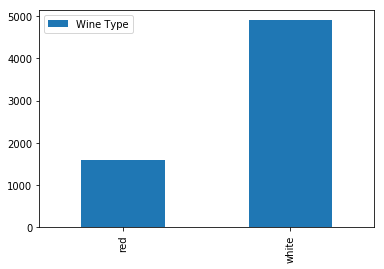

In [57]:
df = dfWineQuality.groupby('wine_type').count().reset_index().iloc[:,[0,1]]
df = df.T
df.columns = ["red", "white"]
df = df.reset_index().T.iloc[1:,1:]
df.columns = ['Wine Type']
df.plot.bar()

**(2) Summary of statistics (by Wine Types) **    
We calculate and summarize various descriptive statistics of wine features those could be useful in our objective of prediction modelling. We group these statistics according to wine types (Red or White)

In [60]:
#Create a subset of features
wineFeatures = ['residual sugar', 'total sulfur dioxide', 'sulphates',
'alcohol', 'volatile acidity', 'quality']
#Round off the features upto 2 decimal places
whiteStats =  round(dfWhiteWine[wineFeatures].describe(), 2)
redStats = round(dfRedWine[wineFeatures].describe(), 2)
#Create a combined table
pd.concat([whiteStats, redStats], keys=["Statistics - White wine", "Statistics - Red wine"], axis = 1)

Statistics - White wine                                          \
               residual sugar total sulfur dioxide sulphates  alcohol   
count                 4898.00              4898.00   4898.00  4898.00   
mean                     6.39               138.36      0.49    10.51   
std                      5.07                42.50      0.11     1.23   
min                      0.60                 9.00      0.22     8.00   
25%                      1.70               108.00      0.41     9.50   
50%                      5.20               134.00      0.47    10.40   
75%                      9.90               167.00      0.55    11.40   
max                     65.80               440.00      1.08    14.20   

                                Statistics - Red wine                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          4898.00  4898.00               1599.00              1599.00   
mean              0.28     5.88                  2.54                46.47   
std               0.10     0.89                  1.41                32.90   
min               0.08     3.00                  0.90                 6.00   
25%               0.21     5.00                  1.90                22.00   
50%               0.26     6.00                  2.20                38.00   
75%               0.32     6.00                  2.60                62.00   
max               1.10     9.00                 15.50               289.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   1599.00  1599.00          1599.00  1599.00  
mean       0.66    10.42             0.53     5.64  
std        0.17     1.07             0.18     0.81  
min        0.33     8.40             0.12     3.00  
25%        0.55     9.50             0.39     5.00  
50%        0.62    10.20             0.52     6.00  
75%        0.73    11.10             0.64     6.00  
max        2.00    14.90             1.58     8.00

<i>**Observations:**</i>       
1. Mean *residual sugar* and *total sulphur dioxide* content seems to be considerably *higher* in white wine than red win
2. Mean *sulphates* and *volatile acidity* is seen to be *lower* for white wines than red ones.    
3. Mean alcohol content of both types of wines appears to be similar i.e. around 10%

**(3) Summary of statistics (by Wine Quality) **    
Now, we group summary statistics as per wine quality.

In [66]:
wineFeatures = ['pH', 'alcohol', 'volatile acidity', 'sulphates']
lowStats =  round(dfWineQuality[dfWineQuality.quality_category == 'low'][wineFeatures].describe(), 2)
mediumStats = round(dfWineQuality[dfWineQuality.quality_category == 'medium'][wineFeatures].describe(), 2)
highStats = round(dfWineQuality[dfWineQuality.quality_category == 'high'][wineFeatures].describe(), 2)
pd.concat([lowStats, mediumStats, highStats], 
          keys=["Low quality", "Medium quality", "High quality"], axis = 1)

Low quality                                     Medium quality           \
               pH  alcohol volatile acidity sulphates             pH  alcohol   
count     2384.00  2384.00          2384.00   2384.00        3915.00  3915.00   
mean         3.21     9.87             0.40      0.52           3.22    10.81   
std          0.16     0.84             0.19      0.14           0.16     1.20   
min          2.74     8.00             0.10      0.25           2.72     8.40   
25%          3.11     9.30             0.26      0.44           3.11     9.80   
50%          3.20     9.60             0.34      0.50           3.21    10.80   
75%          3.31    10.40             0.50      0.58           3.33    11.70   
max          3.90    14.90             1.58      2.00           4.01    14.20   

                                 High quality                           \
      volatile acidity sulphates           pH alcohol volatile acidity   
count          3915.00   3915.00       198.00  198.00           198.00   
mean              0.31      0.54         3.23   11.69             0.29   
std               0.14      0.15         0.16    1.27             0.12   
min               0.08      0.22         2.88    8.50             0.12   
25%               0.21      0.43         3.13   11.00             0.21   
50%               0.27      0.51         3.23   12.00             0.28   
75%               0.36      0.61         3.33   12.60             0.35   
max               1.04      1.95         3.72   14.00             0.85   

                 
      sulphates  
count    198.00  
mean       0.51  
std        0.16  
min        0.25  
25%        0.38  
50%        0.48  
75%        0.60  
max        1.10

<i>**Observations:**</i>       
1. Mean *volatile acidity* seems to drop as wine quality increases
2. Mean *pH* and *sulphates* seem to be consistent irrespective of the wine quality    
3. Noticeably, mean *alcohol* content appears to be gradually increasing with wine quality

### Work in progress....